In [ ]:
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
time: 440 µs (started: 2024-03-04 04:40:57 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time: 1.58 s (started: 2024-03-04 04:41:58 +00:00)


In [ ]:
data = pd.read_csv("diabetes_prediction_dataset.csv", header = "infer")
data.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


time: 229 ms (started: 2024-03-04 04:42:00 +00:00)


In [ ]:
data.shape
data['diabetes']

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

time: 9.32 ms (started: 2024-03-04 04:42:00 +00:00)


<ipython-input-6-750fc1b75af4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['diabetes'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-6-750fc1b75af4>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['diabetes'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


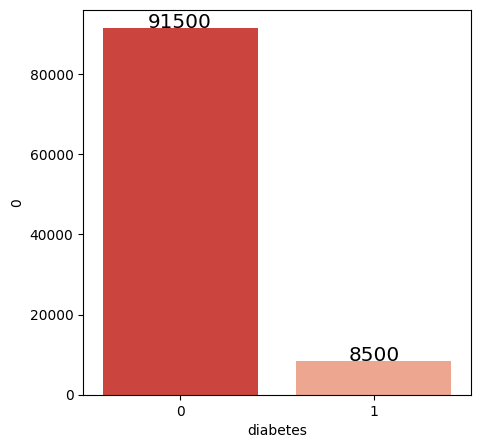

time: 331 ms (started: 2024-03-04 04:42:00 +00:00)


In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('diabetes').size().reset_index()
pal = sns.color_palette("Reds", len(target_group))
rank = target_group["diabetes"].argsort().argsort()
g = sns.barplot(x = target_group['diabetes'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['diabetes'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
print("No. of missing values: ")
for val in data.columns:
  print("\t%s: %d" % (val, data[val].isna().sum()))

data.head()

No. of missing values: 
	gender: 0
	age: 0
	hypertension: 0
	heart_disease: 0
	smoking_history: 0
	bmi: 0
	HbA1c_level: 0
	blood_glucose_level: 0
	diabetes: 0


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


time: 132 ms (started: 2024-03-04 04:42:01 +00:00)


In [ ]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

time: 5.51 ms (started: 2024-03-04 04:42:01 +00:00)


In [ ]:
dup_data = data.duplicated()
print("No. of duplicated rows: %d" % (dup_data.sum()))

No. of duplicated rows: 3854
time: 31.1 ms (started: 2024-03-04 04:42:01 +00:00)


In [ ]:
print('Duplicated rows before discarding = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Duplicated rows after discarding = %d' % (data.shape[0]))

Duplicated rows before discarding = 100000
Duplicated rows after discarding = 96146
time: 45.1 ms (started: 2024-03-04 04:42:01 +00:00)


In [ ]:
numerical_cols = ['age', 'bmi' ,'HbA1c_level','hypertension','heart_disease','blood_glucose_level','diabetes']
categorical_cols = ['gender', 'smoking_history']

time: 650 µs (started: 2024-03-04 04:42:01 +00:00)


In [ ]:
# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0              1            0             0   
1         0              1            0             0   
2         0              0            1             0   
3         0              1            0             0   
4         0              0            1             0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                        0                        0                     0   
1               

#**USING SMOTE SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

time: 388 ms (started: 2024-03-04 04:42:01 +00:00)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = data_encoded.drop(columns=["diabetes"])
y = data["diabetes"]

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardizing/Normalizing features... makes mean 0 and standardization to 1 , whole dataset is in one common format making it easier to process
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy rf:", accuracy_rf)

pd.DataFrame(precision_recall)


Accuracy rf: 0.9606864274570983


,0,1,accuracy,macro avg,weighted avg
precision,0.973811,0.811090,0.960686,0.892450,0.959248
recall,0.983266,0.730970,0.960686,0.857118,0.960686
f1-score,0.978515,0.768949,0.960686,0.873732,0.959760
support,17509.000000,1721.000000,0.960686,19230.000000,19230.000000


time: 19.4 s (started: 2024-03-04 04:42:01 +00:00)


Class 0: 70155 samples
Class 1: 35077 samples


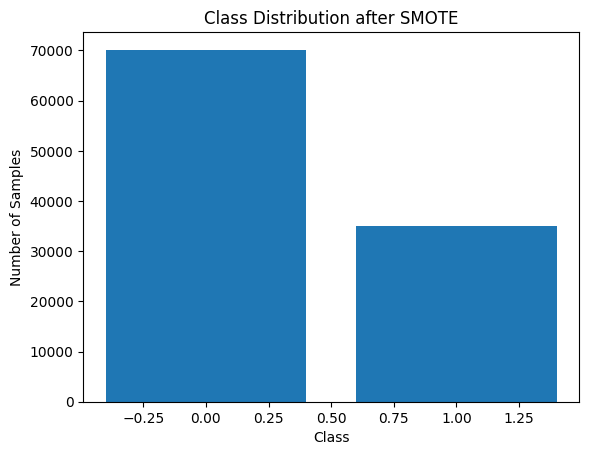

time: 532 ms (started: 2024-03-04 04:42:21 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)

# Count the occurrences of each class in y_train_bal_numeric
class_counts = np.bincount(y_train_bal_numeric)

# Print the class distribution
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} samples")

import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# How the confusion matrix matrix is calculated
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# The confusion matrix prints like this:
# [True Positive (TP), False Negative (FN)]
# [False Positive (FP), True Negative (TN)]

Confusion Matrix:
[[17216   293]
 [  463  1258]]
time: 10.3 ms (started: 2024-03-04 04:42:21 +00:00)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC #linearsvc runs faster than svmlinear

# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm:", accuracy_rf)
print("\nClassification Report:\n", report)

Accuracy svm: 0.9255850234009361

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     17509
           1       0.56      0.80      0.66      1721

    accuracy                           0.93     19230
   macro avg       0.77      0.87      0.81     19230
weighted avg       0.94      0.93      0.93     19230

time: 26.5 s (started: 2024-03-04 04:42:21 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
data.shape

(96146, 9)

time: 3 ms (started: 2024-03-04 04:47:04 +00:00)


In [ ]:
# Assuming your input data is stored in a numpy array called 'X'
num_features = X.shape[1]  # Number of columns in the array
print("Number of features:", num_features)

Number of features: 15
time: 732 µs (started: 2024-03-04 04:47:04 +00:00)


In [ ]:


smoteAlg = SMOTE(random_state=42)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(15,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn * 100

print("dnn smote test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
4385/4385 [==============================] - 11s 2ms/step - loss: 0.2290 - accuracy: 0.8929 - val_loss: 0.1951 - val_accuracy: 0.9120
Epoch 2/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1891 - accuracy: 0.9085 - val_loss: 0.1870 - val_accuracy: 0.9099
Epoch 3/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1790 - accuracy: 0.9135 - val_loss: 0.1933 - val_accuracy: 0.9027
Epoch 4/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1746 - accuracy: 0.9163 - val_loss: 0.1908 - val_accuracy: 0.9064
Epoch 5/10
4385/4385 [==============================] - 11s 2ms/step - loss: 0.1720 - accuracy: 0.9174 - val_loss: 0.1925 - val_accuracy: 0.9033
Epoch 6/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1693 - accuracy: 0.9185 - val_loss: 0.1908 - val_accuracy: 0.9034
Epoch 7/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1673 - accuracy: 0.9191 - val_loss: 0.1908 - val_acc

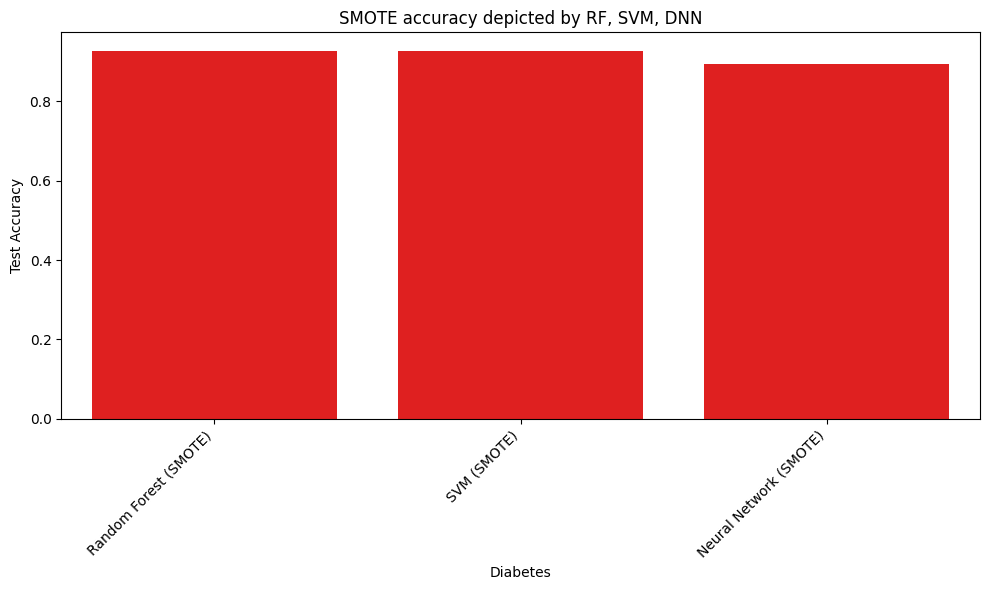

time: 298 ms (started: 2024-03-04 04:49:33 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='red')
plt.xticks(rotation=45, ha='right')
plt.title('SMOTE accuracy depicted by RF, SVM, DNN')
plt.xlabel('Diabetes')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **USING ADASYN SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before ADASYN:
0    70155
1     6761
Name: diabetes, dtype: int64
Class distribution after ADASYN:
0    70155
1    69792
Name: diabetes, dtype: int64
time: 6.01 s (started: 2024-03-04 04:49:34 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.9471658866354654


,0,1,accuracy,macro avg,weighted avg
precision,0.977532,0.679755,0.947166,0.828644,0.950882
recall,0.964133,0.774550,0.947166,0.869341,0.947166
f1-score,0.970786,0.724063,0.947166,0.847425,0.948706
support,17509.000000,1721.000000,0.947166,19230.000000,19230.000000


time: 17.6 s (started: 2024-03-04 04:49:40 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.8174206968278731

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89     17509
           1       0.32      0.95      0.48      1721

    accuracy                           0.82     19230
   macro avg       0.66      0.88      0.69     19230
weighted avg       0.93      0.82      0.85     19230

time: 34.8 s (started: 2024-03-04 04:49:57 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['diabetes'], axis=1)
y = data_encoded['diabetes']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(15,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))
# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)
test_accuracy_percentage = accuracy_dnn_adasyn * 100

print("dnn adaysn test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.2248 - accuracy: 0.8945 - val_loss: 0.2626 - val_accuracy: 0.8789
Epoch 2/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1846 - accuracy: 0.9106 - val_loss: 0.2551 - val_accuracy: 0.8784
Epoch 3/10
4385/4385 [==============================] - 11s 2ms/step - loss: 0.1764 - accuracy: 0.9149 - val_loss: 0.2578 - val_accuracy: 0.8784
Epoch 4/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1733 - accuracy: 0.9167 - val_loss: 0.2604 - val_accuracy: 0.8741
Epoch 5/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1702 - accuracy: 0.9186 - val_loss: 0.2645 - val_accuracy: 0.8728
Epoch 6/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1684 - accuracy: 0.9192 - val_loss: 0.2650 - val_accuracy: 0.8757
Epoch 7/10
4385/4385 [==============================] - 11s 2ms/step - loss: 0.1667 - accuracy: 0.9200 - val_loss: 0.2707 - val_accur

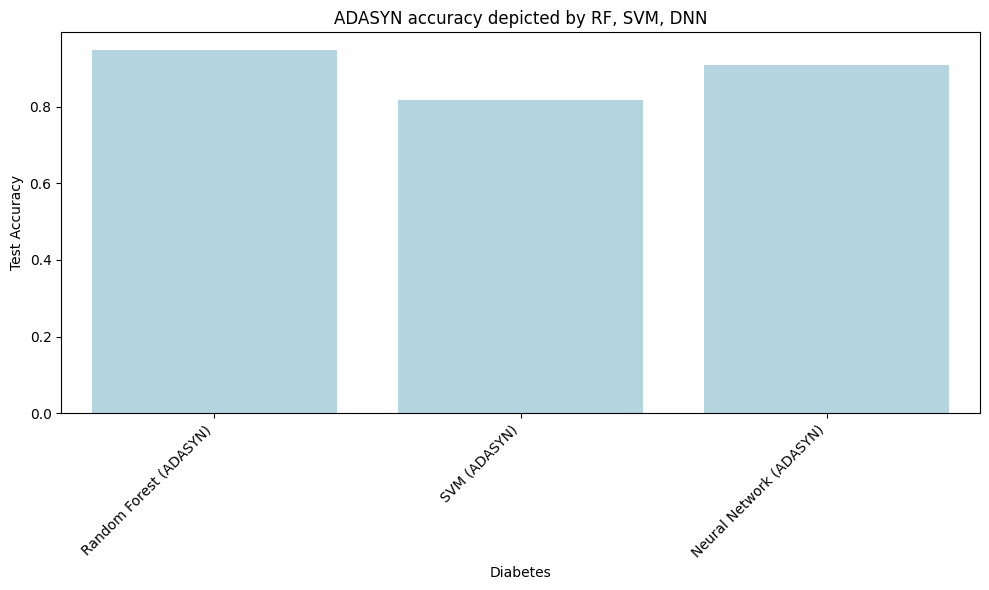

time: 270 ms (started: 2024-03-04 04:52:20 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('ADASYN accuracy depicted by RF, SVM, DNN')
plt.xlabel('Diabetes')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **RANDOM OVERSAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    70155
1    70155
Name: diabetes, dtype: int64
time: 31.7 ms (started: 2024-03-04 04:52:20 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_oversampling = accuracy_score(y_test, y_pred)
print("Accuracy rf random oversampling :", accuracy_rf_random_oversampling)

pd.DataFrame(precision_recall)

Accuracy rf random oversampling : 0.9615184607384295


,0,1,accuracy,macro avg,weighted avg
precision,0.972078,0.833561,0.961518,0.902820,0.959703
recall,0.986067,0.711292,0.961518,0.848679,0.961518
f1-score,0.979023,0.767588,0.961518,0.873305,0.960133
support,8756.000000,859.000000,0.961518,9615.000000,9615.000000


time: 8.96 s (started: 2024-03-04 04:52:20 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_oversampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm random oversampling :", accuracy_svm_random_oversampling)
print("\nClassification Report:\n", report)

Accuracy svm random oversampling : 0.887467498699948

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      8756
           1       0.44      0.87      0.58       859

    accuracy                           0.89      9615
   macro avg       0.71      0.88      0.76      9615
weighted avg       0.94      0.89      0.90      9615

time: 25.9 s (started: 2024-03-04 04:52:29 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['diabetes'], axis=1)
y = data_encoded['diabetes']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply ros to balance the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(15,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))

# Evaluate the model on the test set
loss, accuracy_dnn_random_oversampling = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_oversampling * 100

print("dnn random oversampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
4385/4385 [==============================] - 11s 2ms/step - loss: 0.2222 - accuracy: 0.8954 - val_loss: 0.1930 - val_accuracy: 0.9083
Epoch 2/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1846 - accuracy: 0.9111 - val_loss: 0.1908 - val_accuracy: 0.9050
Epoch 3/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1767 - accuracy: 0.9150 - val_loss: 0.1901 - val_accuracy: 0.9040
Epoch 4/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1732 - accuracy: 0.9167 - val_loss: 0.1914 - val_accuracy: 0.9036
Epoch 5/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1702 - accuracy: 0.9179 - val_loss: 0.1981 - val_accuracy: 0.9055
Epoch 6/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1678 - accuracy: 0.9192 - val_loss: 0.2004 - val_accuracy: 0.9031
Epoch 7/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1662 - accuracy: 0.9202 - val_loss: 0.2000 - val_acc

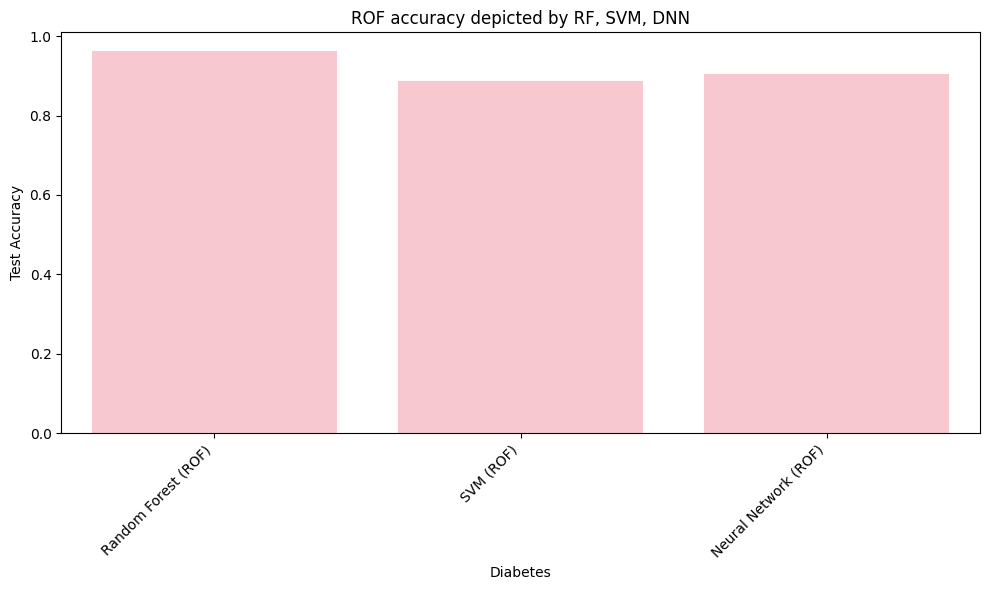

time: 263 ms (started: 2024-03-04 04:55:20 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (ROF)': accuracy_rf_random_oversampling,
    'SVM (ROF)': accuracy_svm_random_oversampling,
    'Neural Network (ROF)': accuracy_dnn_random_oversampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='pink')
plt.xticks(rotation=45, ha='right')
plt.title('ROF accuracy depicted by RF, SVM, DNN')
plt.xlabel('Diabetes')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **RANDOM UNDER SAMPLING ALGORITHM (RF, SVM, DNN)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    6761
1    6761
Name: diabetes, dtype: int64
time: 22.3 ms (started: 2024-03-04 04:55:20 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_random_undersampling = accuracy_score(y_test, y_pred)
print("Accuracy rf random undersampling:",accuracy_rf_random_undersampling)

pd.DataFrame(precision_recall)

Accuracy rf random undersampling: 0.8943317732709308


,0,1,accuracy,macro avg,weighted avg
precision,0.988513,0.453633,0.894332,0.721073,0.940727
recall,0.894358,0.894063,0.894332,0.894211,0.894332
f1-score,0.939081,0.601881,0.894332,0.770481,0.908956
support,8756.000000,859.000000,0.894332,9615.000000,9615.000000


time: 1.18 s (started: 2024-03-04 04:55:20 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_random_undersampling = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy svm random undersampling:", accuracy_svm_random_undersampling)
print("\nClassification Report:\n", report)

Accuracy svm random undersampling: 0.8866354654186167

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93      8756
           1       0.43      0.87      0.58       859

    accuracy                           0.89      9615
   macro avg       0.71      0.88      0.76      9615
weighted avg       0.94      0.89      0.90      9615

time: 754 ms (started: 2024-03-04 04:55:21 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['diabetes'], axis=1)
y = data_encoded['diabetes']

#Standardizing/Normalizing features
scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply rus to balance the training set
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)


# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(15,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))


# Evaluate the model on the test set
loss, accuracy_dnn_random_undersampling = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)

test_accuracy_percentage = accuracy_dnn_random_undersampling * 100

print("dnn random undersampling test Accuracy: {:.2f}%".format(test_accuracy_percentage))


Epoch 1/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.2221 - accuracy: 0.8950 - val_loss: 0.1966 - val_accuracy: 0.9130
Epoch 2/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1889 - accuracy: 0.9077 - val_loss: 0.1889 - val_accuracy: 0.9124
Epoch 3/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1786 - accuracy: 0.9132 - val_loss: 0.1950 - val_accuracy: 0.9136
Epoch 4/10
4385/4385 [==============================] - 8s 2ms/step - loss: 0.1741 - accuracy: 0.9157 - val_loss: 0.1943 - val_accuracy: 0.9078
Epoch 5/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1710 - accuracy: 0.9172 - val_loss: 0.1889 - val_accuracy: 0.9159
Epoch 6/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1688 - accuracy: 0.9186 - val_loss: 0.1965 - val_accuracy: 0.9118
Epoch 7/10
4385/4385 [==============================] - 8s 2ms/step - loss: 0.1667 - accuracy: 0.9191 - val_loss: 0.1957 - val_accuracy

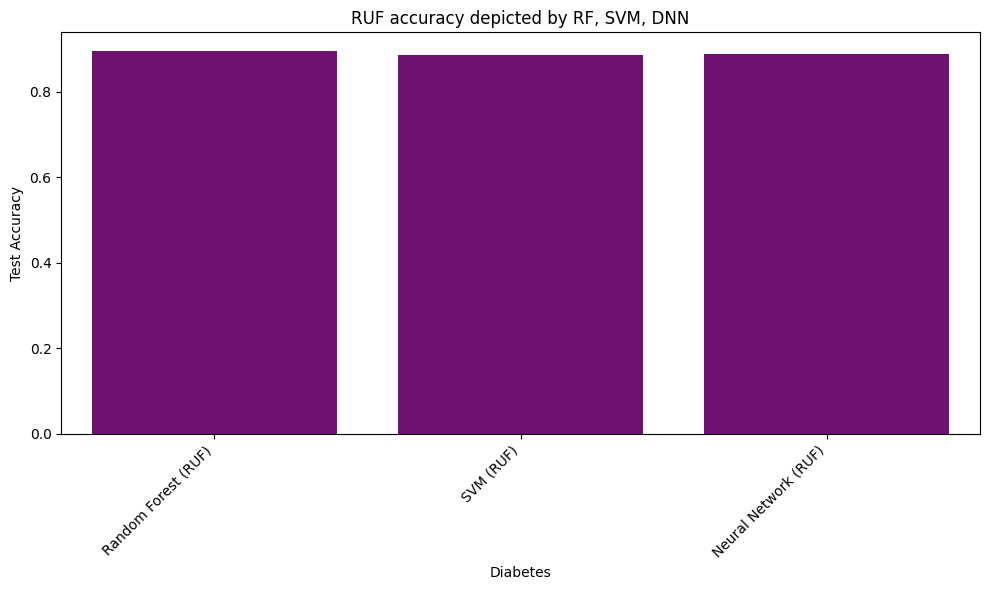

time: 262 ms (started: 2024-03-04 04:57:47 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (RUF)': accuracy_rf_random_undersampling,
    'SVM (RUF)': accuracy_svm_random_undersampling,
    'Neural Network (RUF)': accuracy_dnn_random_undersampling,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('RUF accuracy depicted by RF, SVM, DNN')
plt.xlabel('Diabetes')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# **GAMMA DISTRIBUTION SAMPLING (RF, SVM, DNN)**

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
0.0    8482
1.0    8482
dtype: int64
time: 19.9 ms (started: 2024-03-04 04:57:47 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)
# Convert float labels in y_pred to string labels
y_pred_labels = [1 if pred == 1 else 0 for pred in y_pred]

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred_labels, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred_labels)
print("Accuracy rf gamma:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy rf gamma: 0.14747789911596465


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.094854,0.147478,0.547427,0.919135
recall,0.063842,1.000000,0.147478,0.531921,0.147478
f1-score,0.120021,0.173273,0.147478,0.146647,0.124779
support,8756.000000,859.000000,0.147478,9615.000000,9615.000000


time: 803 ms (started: 2024-03-04 04:57:47 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Convert float labels in y_pred to string labels
y_pred_labels = [1 if pred == 1 else 0 for pred in y_pred]

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print("Accuracy svm gamma:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy svm gamma: 0.666250650026001

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78      8756
           1       0.21      0.97      0.34       859

    accuracy                           0.67      9615
   macro avg       0.60      0.80      0.56      9615
weighted avg       0.92      0.67      0.74      9615

time: 953 ms (started: 2024-03-04 04:57:48 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Splitting data into: features (X) and target (y)
X = data_encoded.drop(columns=['diabetes'], axis=1)
y = data_encoded['diabetes']

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_train_bal_numeric = label_encoder.fit_transform(y_train_bal)
y_val_bal_numeric = label_encoder.transform(y_val_bal)
y_test_numeric=label_encoder.fit_transform(y_test)


# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(15,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''
# Train the model
history = model.fit(X_train_bal, y_train_bal_numeric, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal_numeric))


# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test_numeric)

# Make predictions
y_pred = model.predict(X_test)
test_accuracy_percentage = accuracy_dnn_gamma * 100

print("Test Accuracy dnn gamma: {:.2f}%".format(test_accuracy_percentage))

Epoch 1/10
4385/4385 [==============================] - 11s 2ms/step - loss: 0.2245 - accuracy: 0.8942 - val_loss: 0.1957 - val_accuracy: 0.9101
Epoch 2/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1888 - accuracy: 0.9088 - val_loss: 0.1914 - val_accuracy: 0.9107
Epoch 3/10
4385/4385 [==============================] - 10s 2ms/step - loss: 0.1793 - accuracy: 0.9132 - val_loss: 0.1932 - val_accuracy: 0.9072
Epoch 4/10
4385/4385 [==============================] - 8s 2ms/step - loss: 0.1751 - accuracy: 0.9158 - val_loss: 0.1899 - val_accuracy: 0.9095
Epoch 5/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1722 - accuracy: 0.9168 - val_loss: 0.1963 - val_accuracy: 0.8979
Epoch 6/10
4385/4385 [==============================] - 9s 2ms/step - loss: 0.1701 - accuracy: 0.9184 - val_loss: 0.1953 - val_accuracy: 0.9020
Epoch 7/10
4385/4385 [==============================] - 8s 2ms/step - loss: 0.1682 - accuracy: 0.9191 - val_loss: 0.1923 - val_accurac

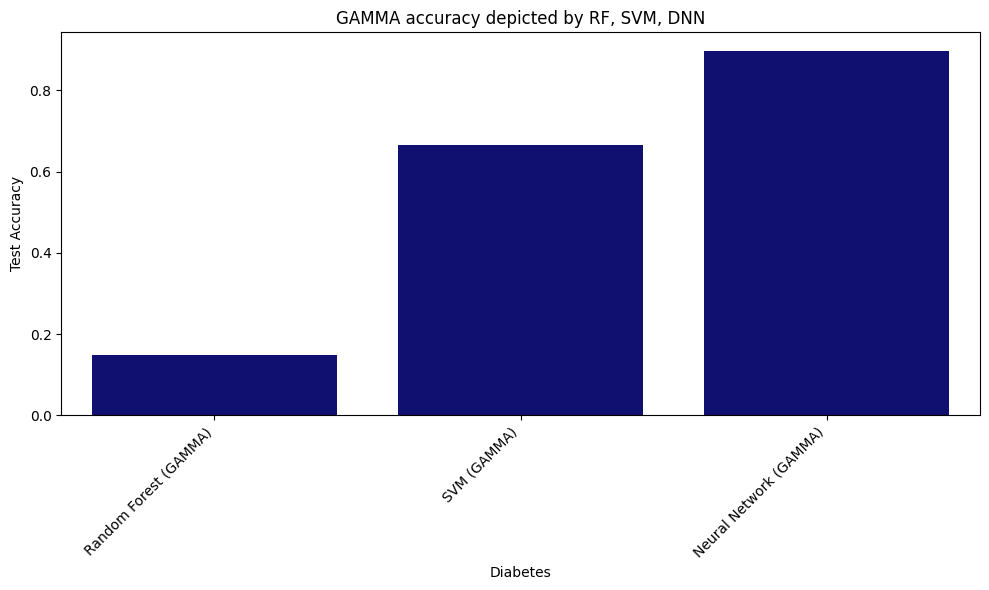

time: 273 ms (started: 2024-03-04 05:00:13 +00:00)


In [ ]:
test_accuracies = {
    'Random Forest (GAMMA)': accuracy_rf_gamma,
    'SVM (GAMMA)': accuracy_svm_gamma,
    'Neural Network (GAMMA)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm

plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('GAMMA accuracy depicted by RF, SVM, DNN')
plt.xlabel('Diabetes')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

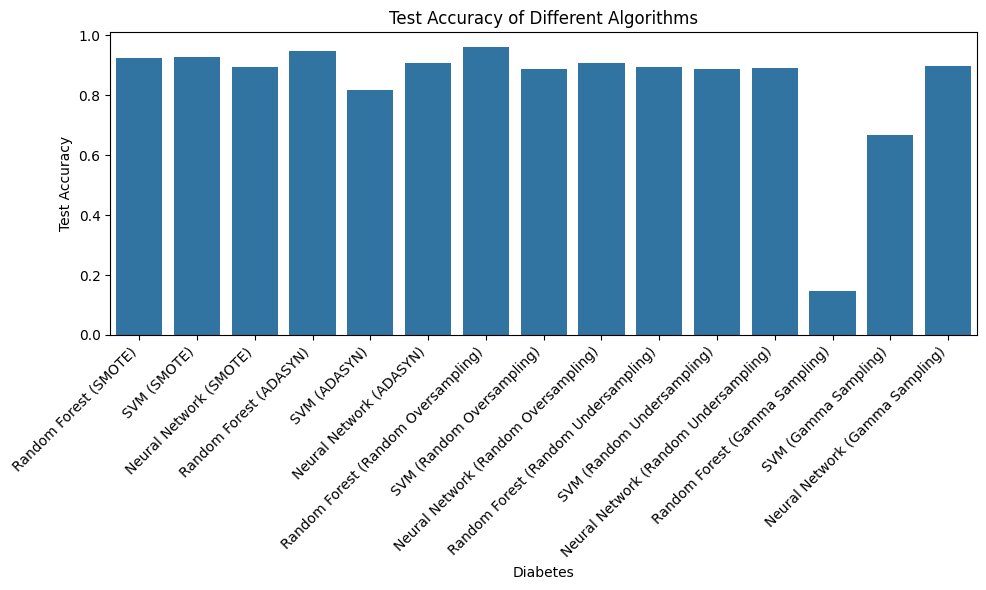

time: 426 ms (started: 2024-03-04 05:00:13 +00:00)


In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_random_oversampling,
    'SVM (Random Oversampling)': accuracy_svm_random_oversampling,
    'Neural Network (Random Oversampling)': accuracy_dnn_random_oversampling,
    'Random Forest (Random Undersampling)': accuracy_rf_random_undersampling,
    'SVM (Random Undersampling)': accuracy_svm_random_undersampling,
    'Neural Network (Random Undersampling)': accuracy_dnn_random_undersampling,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('Diabetes')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()


# **END OF ANALYSIS**

In [ ]:
SMOTE_mean = (accuracy_rf + accuracy_svm + accuracy_dnn) / 3 * 100
print("SMOTE avg: ", SMOTE_mean)

adasyn_mean = (accuracy_rf_adasyn + accuracy_svm_adasyn + accuracy_dnn_adasyn) / 3 * 100
print("Adasyn avg: ", adasyn_mean)

ros_mean = (accuracy_rf_random_oversampling + accuracy_svm_random_oversampling + accuracy_dnn_random_oversampling) / 3 * 100
print("ROS avg: ", ros_mean)

ruf_mean = (accuracy_rf_random_undersampling + accuracy_svm_random_undersampling + accuracy_dnn_random_undersampling) / 3 * 100
print("RUF avg: ", SMOTE_mean)

Gamma_mean = (accuracy_rf_gamma + accuracy_svm_gamma + accuracy_dnn_gamma) / 3 * 100
print("Gamma avg: ", Gamma_mean)

SMOTE avg:  91.58779697063622
Adasyn avg:  89.11596389902921
ROS avg:  91.82527228686193
RUF avg:  91.58779697063622
Gamma avg:  57.053215571883065
time: 6.77 ms (started: 2024-03-04 05:00:14 +00:00)
